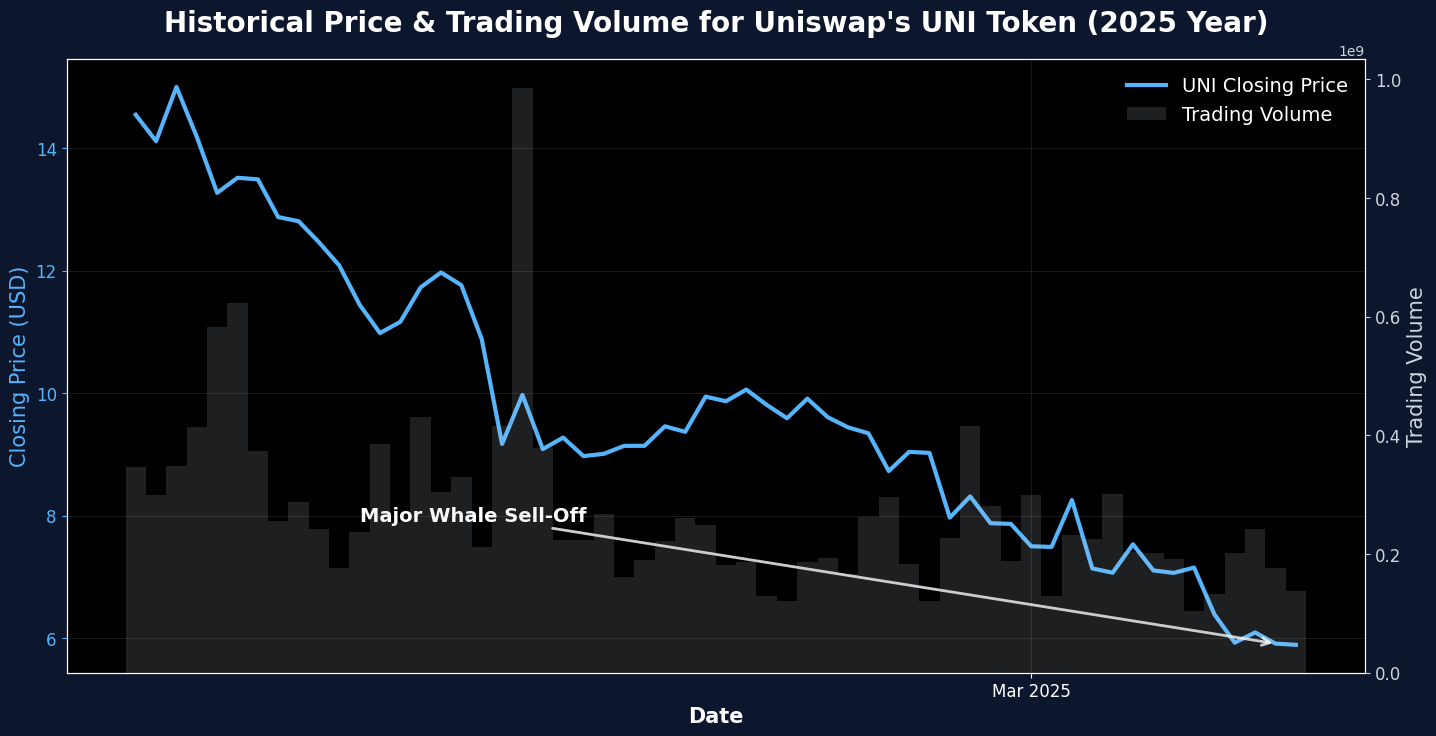

<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests
import numpy as np

# Data from https://www.coingecko.com/en/coins/uniswap
df = pd.read_csv('UNI_25.csv', delimiter=';')
df['timeClose'] = pd.to_datetime(df['timeClose'], utc=True)
latest_date = df['timeClose'].max()
one_year_ago = latest_date - pd.Timedelta(days=365)
df = df[df['timeClose'] >= one_year_ago]

df.sort_values('timeClose', inplace=True)
plt.style.use('dark_background')

# figure and axes
fig, ax1 = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('#0C162D')

# Plot closing price
ax1.plot(df['timeClose'], df['close'], color='#56B4FC', linewidth=3, label='UNI Closing Price')

# axis labels
ax1.set_xlabel('Date', fontsize=15, fontweight='bold', color='white')
ax1.set_ylabel('Closing Price (USD)', fontsize=15, color='#56B4FC')
ax1.tick_params(axis='y', colors='#56B4FC', labelsize=12)
ax1.tick_params(axis='x', colors='white', labelsize=12)

# Trading Volume axis
ax2 = ax1.twinx()
ax2.bar(df['timeClose'], df['volume'], color='#CED4DE', alpha=0.15, width=1, label='Trading Volume')
ax2.set_ylabel('Trading Volume', fontsize=15, color='#CED4DE')
ax2.tick_params(axis='y', colors='#CED4DE', labelsize=12)

# formatted dates every 2 months
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')

# Subtle grid
ax1.grid(alpha=0.1, color='white')

# title
plt.title("Historical Price & Trading Volume for Uniswap's UNI Token (2025 Year)",
          fontsize=20, fontweight='bold', color='white', pad=20)

lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
legend = ax1.legend(lines + bars, labels + bar_labels, fontsize=14, frameon=False, loc='upper right')

event_date = pd.Timestamp('2025-03-13', tz='UTC')
closest_date_row = df.iloc[(df['timeClose'] - event_date).abs().argsort()[:1]]
event_close_price = closest_date_row['close'].values[0]

ax1.annotate("Major Whale Sell-Off",
             xy=(closest_date_row['timeClose'].values[0], event_close_price),
             xytext=(closest_date_row['timeClose'].values[0] - pd.Timedelta(days=45), event_close_price + 2),
             fontsize=14, fontweight='bold', color='white',
             arrowprops=dict(facecolor='white', arrowstyle='->', linewidth=2, alpha=0.8))

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

fig.tight_layout(pad=3)
plt.show()
plt.savefig("figure1.png")

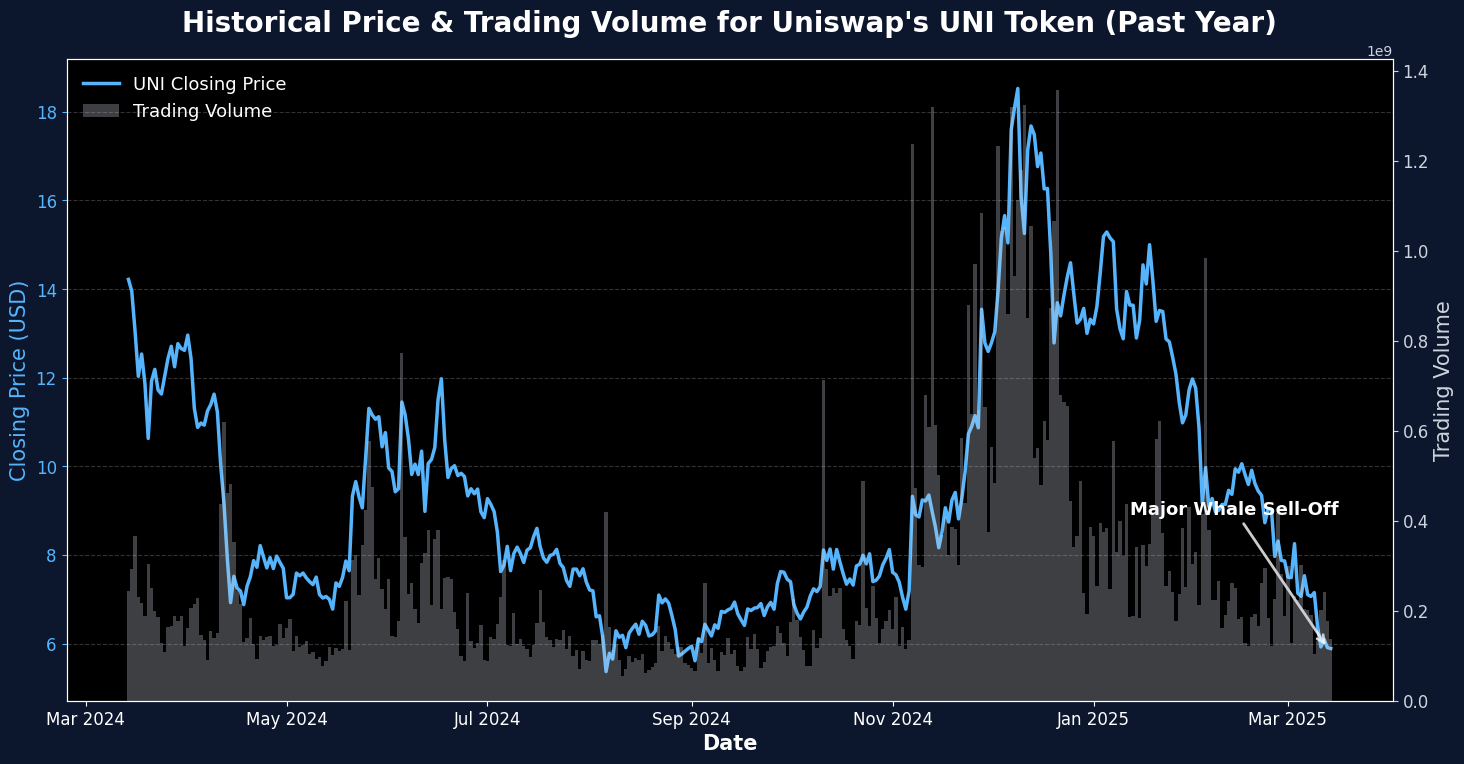

<Figure size 640x480 with 0 Axes>

In [2]:
# Data from https://www.coingecko.com/en/coins/uniswap

df = pd.read_csv('UNI_24_25.csv', delimiter=';')
df['timeClose'] = pd.to_datetime(df['timeClose'], utc=True)

latest_date = df['timeClose'].max()
one_year_ago = latest_date - pd.Timedelta(days=365)
df = df[df['timeClose'] >= one_year_ago]
df.sort_values('timeClose', inplace=True)
plt.style.use('dark_background')

# figure and axes
fig, ax1 = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('#0C162D')

# Plot closing price
ax1.plot(df['timeClose'], df['close'], color='#56B4FC', linewidth=2.5, label='UNI Closing Price')

# axis labels
ax1.set_xlabel('Date', fontsize=15, fontweight='bold', color='white')
ax1.set_ylabel('Closing Price (USD)', fontsize=15, color='#56B4FC')
ax1.tick_params(axis='y', colors='#56B4FC', labelsize=12)
ax1.tick_params(axis='x', colors='white', labelsize=12)

# Trading Volume axis
ax2 = ax1.twinx()
ax2.bar(df['timeClose'], df['volume'], color='#CED4DE', alpha=0.3, width=1.0, label='Trading Volume')
ax2.set_ylabel('Trading Volume', fontsize=15, color='#CED4DE')
ax2.tick_params(axis='y', colors='#CED4DE', labelsize=12)

# Date formatting every 2 months
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right')

ax1.yaxis.grid(True, linestyle='dashed', alpha=0.2, color='white')
ax1.xaxis.grid(False)

# title
plt.title("Historical Price & Trading Volume for Uniswap's UNI Token (Past Year)",
          fontsize=20, fontweight='bold', color='white', pad=20)

# Legend
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, fontsize=13, frameon=False, loc='upper left')

# major event
event_date = pd.Timestamp('2025-03-13', tz='UTC')
closest_row = df.iloc[(df['timeClose'] - event_date).abs().argsort()[:1]]
event_price = closest_row['close'].values[0]

ax1.annotate("Major Whale Sell-Off",
             xy=(closest_row['timeClose'].values[0], event_price),
             xytext=(closest_row['timeClose'].values[0] - pd.Timedelta(days=60), event_price + 3),
             fontsize=13, fontweight='bold', color='white',
             arrowprops=dict(facecolor='white', arrowstyle='->', linewidth=2, alpha=0.8))

fig.tight_layout(pad=2)
plt.show()
plt.savefig("figure2.png")

In [3]:
# Data from https://defillama.com/

def get_historical_tvl(protocol_slug):
    url = f"https://api.llama.fi/protocol/{protocol_slug}"
    response = requests.get(url)
    data = response.json()
    tvl_data = data['tvl']
    df = pd.DataFrame(tvl_data)
    df['date'] = pd.to_datetime(df['date'], unit='s')
    df.rename(columns={'totalLiquidityUSD': f'{protocol_slug}_TVL'}, inplace=True)
    return df[['date', f'{protocol_slug}_TVL']]

# Get data for each protocol
uniswap_df = get_historical_tvl('uniswap')
sushiswap_df = get_historical_tvl('sushiswap')
pancakeswap_df = get_historical_tvl('pancakeswap')

# Merge all data into one DataFrame
combined_df = uniswap_df.merge(sushiswap_df, on='date', how='inner').merge(pancakeswap_df, on='date', how='inner')

combined_df.to_csv('TVL_comparison.csv', index=False)
print(combined_df.head())

        date   uniswap_TVL  sushiswap_TVL  pancakeswap_TVL
0 2021-04-22  8.964460e+09   4.173139e+09     5.989983e+02
1 2021-04-23  9.000760e+09   4.224497e+09     5.991069e+02
2 2021-04-24  8.980530e+09   4.089556e+09     3.116743e+09
3 2021-04-25  8.544299e+09   3.882057e+09     4.200815e+09
4 2021-04-26  8.908672e+09   3.888319e+09     5.061871e+09


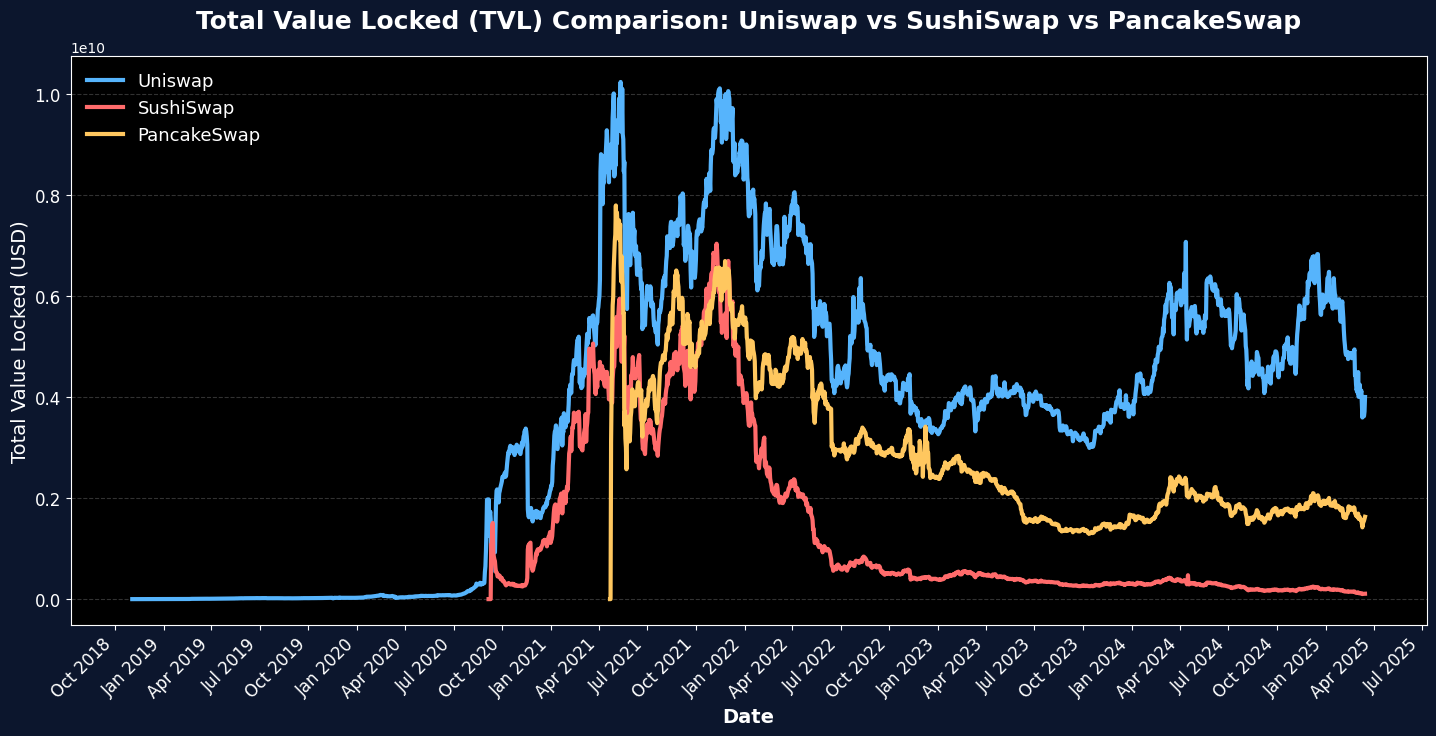

<Figure size 640x480 with 0 Axes>

In [4]:
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('#0C162D')

# Plot each protocol
ax.plot(uniswap_df['date'], uniswap_df['uniswap_TVL'], label='Uniswap', linewidth=3, color='#56B4FC')
ax.plot(sushiswap_df['date'], sushiswap_df['sushiswap_TVL'], label='SushiSwap', linewidth=3, color='#FF6B6B')
ax.plot(pancakeswap_df['date'], pancakeswap_df['pancakeswap_TVL'], label='PancakeSwap', linewidth=3, color='#FFC75F')

ax.set_xlabel('Date', fontsize=14, fontweight='bold', color='white')
ax.set_ylabel('Total Value Locked (USD)', fontsize=14, color='white')
ax.tick_params(axis='y', colors='white', labelsize=12)
ax.tick_params(axis='x', colors='white', labelsize=12)

# Format dates
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45, ha='right', fontsize=12, color='white')

ax.yaxis.grid(True, linestyle='dashed', alpha=0.2, color='white')
ax.xaxis.grid(False)

plt.title('Total Value Locked (TVL) Comparison: Uniswap vs SushiSwap vs PancakeSwap',
          fontsize=18, fontweight='bold', color='white', pad=20)

plt.legend(fontsize=13, frameon=False, loc='upper left')

fig.tight_layout(pad=3)

plt.show()
plt.savefig("figure3.png")

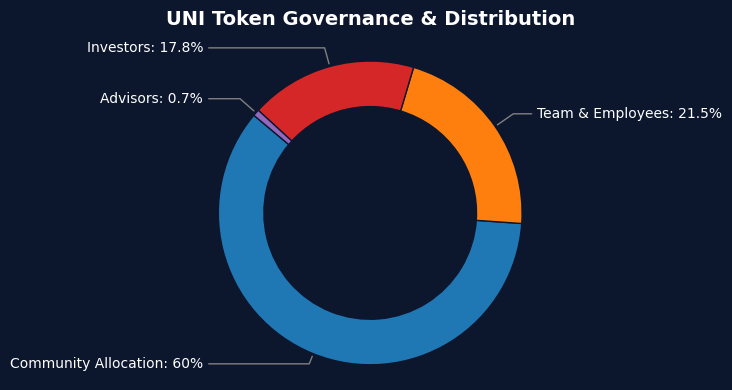

<Figure size 640x480 with 0 Axes>

In [5]:
# Data from https://blog.uniswap.org/uni
labels = ['Community Allocation', 'Team & Employees', 'Investors', 'Advisors']
sizes = [60, 21.5, 17.8, 0.7]
colors = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd']

fig, ax = plt.subplots(figsize=(6, 4), facecolor='#0C162D')

wedges, texts = ax.pie(
    sizes,
    labels=None,
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.3, edgecolor='#0C162D')
)

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = np.sin(np.deg2rad(angle))
    x = np.cos(np.deg2rad(angle))

    horizontalalignment = 'left' if x > 0 else 'right'
    connectionstyle = f"angle,angleA=0,angleB={angle}"
    ax.annotate(
        f"{labels[i]}: {sizes[i]}%",
        xy=(x, y),
        xytext=(1.1 * np.sign(x), 1.1 * y),
        horizontalalignment=horizontalalignment,
        fontsize=10,  # Reduced font size
        color='white',
        arrowprops=dict(arrowstyle="-", connectionstyle=connectionstyle, color='gray')
    )

ax.set_title('UNI Token Governance & Distribution', fontsize=14, fontweight='bold', color='white', pad=15)  # Smaller title
ax.axis('equal')

plt.tight_layout()
plt.show()
plt.savefig("figure4.png", dpi=100)